<a href="https://colab.research.google.com/github/LindsClar/Capstone-3/blob/main/Data_Wrangling_Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Coffee Sales

Coffee is my favorite drug, and as a mom, it's the drug I drink daily. I especially love my coffee when someone else makes it. Through these Coffee sales I will be cleaning and organizing the data to assist my favorite businesses.

Data: https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales/input

Table of contents
  - Import libraries
  - Import Data
  - Analyze data
  - Shaping the Data
    - Renaming and removing unneccessary data




In [84]:
#import all my libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import plotly.express as px
from datetime import datetime

Reading in the Data

In [85]:
#importing data
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')

Analyzing the DF.

In [86]:
df.head(20)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


Now that the Data a loaded, it's time to analyze the data to determine how we'll approach it. I see above that there a lot of columns that aren't necceary so I will be dropping them down below. This will streamline the data necceary.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [88]:
df.shape

(149116, 11)

In [89]:
df.isnull()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149111,False,False,False,False,False,False,False,False,False,False,False
149112,False,False,False,False,False,False,False,False,False,False,False
149113,False,False,False,False,False,False,False,False,False,False,False
149114,False,False,False,False,False,False,False,False,False,False,False


# Transforming the Data
Looking through the data, there are a few changes I plan to make to better organize how the DataFrame is presented.

Based on how the data is currently structured, I’ve decided to take a different approach instead of melting or pivoting the data. I will narrow down the data first and then expand the columns that track the time periods and restaurants.

I’ll start by creating a column to track the time periods. Then, I will expand the store information to include separate columns for each restaurant. The goal is to clean the data thoroughly and reshape it so that it aligns with key metrics like the time of day (period), day of the week, and specific dates, making it easier to analyze.

In [90]:
df.rename(columns={'transaction_qty': 'Qty','transaction_date': 'Date', 'transaction_time': 'Time', 'store_location': 'Store','product_category': 'Product'}, inplace=True)

In [91]:
df.head()

,transaction_id,Date,Time,Qty,store_id,Store,product_id,unit_price,Product,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [92]:
#Product category and Product type are extremely similar
df = df.drop(columns=['product_type', 'transaction_id','store_id', 'product_id', 'unit_price', 'product_detail'])
df.head(20)

,Date,Time,Qty,Store,Product
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee
1,2023-01-01,07:08:56,2,Lower Manhattan,Tea
2,2023-01-01,07:14:04,2,Lower Manhattan,Drinking Chocolate
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee
4,2023-01-01,07:22:41,2,Lower Manhattan,Tea
5,2023-01-01,07:22:41,1,Lower Manhattan,Bakery
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee
9,2023-01-01,07:39:34,2,Lower Manhattan,Drinking Chocolate


 I don't like how the table has a lot more NaN, also should I use .melt? I was thinking of seperating

Note: the product category to create three or 4 smaller df by category
  Product Category
    - Coffee
    - Tea
    - Drinking coffee
    - Bakery

In [93]:
coffee_df = df[df['Product'].str.contains('coffee', case=False)]
coffee_df.head(200)

,Date,Time,Qty,Store,Product
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee
...,...,...,...,...,...
439,2023-01-01,17:28:42,1,Lower Manhattan,Coffee
451,2023-01-01,17:44:28,2,Astoria,Coffee
453,2023-01-01,17:44:48,1,Hell's Kitchen,Coffee
454,2023-01-01,17:45:21,1,Hell's Kitchen,Coffee


In [94]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60169 entries, 0 to 149114
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     60169 non-null  datetime64[ns]
 1   Time     60169 non-null  object        
 2   Qty      60169 non-null  int64         
 3   Store    60169 non-null  object        
 4   Product  60169 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.8+ MB


In [95]:
#checking shape of DF
coffee_df.shape

(60169, 5)

In [96]:
#px.line(df, x=df.index, y=df.columns)


Rename the product details

Examing Unique values and missing values to drop

In [97]:
coffee_df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


<ipython-input-97-7683958c56e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [98]:


#new column to create a distinct period of time morning, day, night
coffee_df['period'] = pd.cut(
    pd.to_datetime(coffee_df['Time'], format='%H:%M:%S').dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['late night', 'morning', 'afternoon', 'evening'],  # unique lables
    right=False
)


<ipython-input-98-313fa988ad6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['period'] = pd.cut(


In [99]:
#inspect
coffee_df.head(5)

,Date,Time,Qty,Store,Product,period
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee,morning
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee,morning
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee,morning
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee,morning
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee,morning


In [100]:
#ensuring format of time in the df
coffee_df['Date'] = pd.to_datetime(coffee_df['Date'], format='%Y-%m-%d')

<ipython-input-100-15708e3a3b20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['Date'] = pd.to_datetime(coffee_df['Date'], format='%Y-%m-%d')


In [101]:
coffee_df.loc[:, 'Date'] = pd.to_datetime(coffee_df['Date'], format='%Y-%m-%d')

In [102]:
#plotting product so converting to a #
#coffee_df['Product_Count'] = coffee_df.groupby('Product')['Product'].transform('count')
#Transactional Qty is more useful for plotting

In [103]:
coffee_df.head(5)

,Date,Time,Qty,Store,Product,period
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee,morning
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee,morning
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee,morning
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee,morning
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee,morning


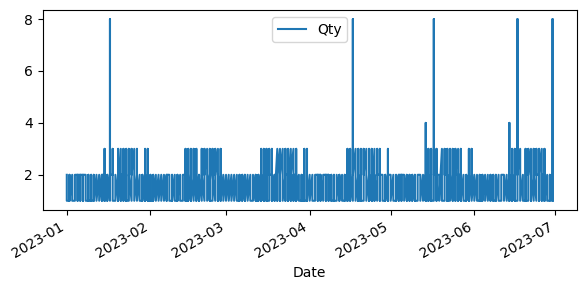

In [104]:
#now I can plot the date to product purchase
coffee_df.plot(x='Date', y='Qty', subplots=True, figsize=(6, 3))
plt.tight_layout()
plt.show()

With the plotting above I can see how purchase across the time line of 7 months is. We can also see how many coffee's customers purchase.

In [112]:
coffee_df.describe()

,Date,Qty
count,60169,60169.000000
mean,2023-04-15 14:55:07.603583232,1.513703
min,2023-01-01 00:00:00,1.000000
25%,2023-03-06 00:00:00,1.000000
50%,2023-04-24 00:00:00,1.000000
75%,2023-05-30 00:00:00,2.000000
max,2023-06-30 00:00:00,8.000000
std,NaN,0.556670


In [105]:
#the new column day_type
coffee_df['day_type'] = coffee_df['Date'].dt.day_name()

<ipython-input-105-311826cc6380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['day_type'] = coffee_df['Date'].dt.day_name()


In [106]:
#filling the column with the type of week ie. weekend and weekday
coffee_df['day_type'] = coffee_df['Date'].dt.weekday.apply(lambda x: 'weekday' if x < 5 else 'weekend')

<ipython-input-106-4a744ef33e0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['day_type'] = coffee_df['Date'].dt.weekday.apply(lambda x: 'weekday' if x < 5 else 'weekend')


In [107]:
#inspecting
coffee_df.head(5)

,Date,Time,Qty,Store,Product,period,day_type
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee,morning,weekend
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee,morning,weekend
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee,morning,weekend
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee,morning,weekend
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee,morning,weekend


<ipython-input-134-e2ab5665a97e>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



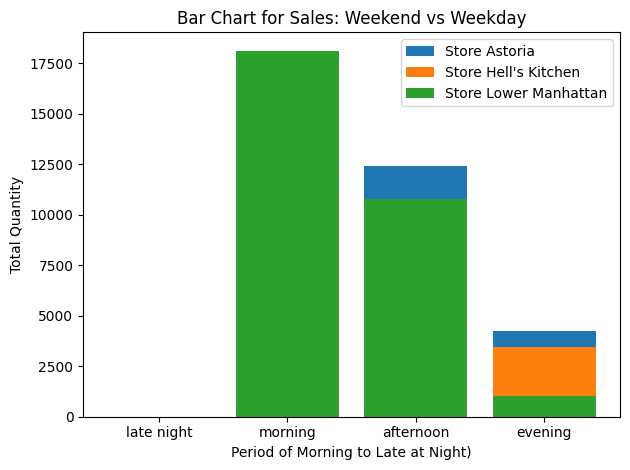

In [134]:
fig, ax = plt.subplots()

#"Period" * "Store" = "Qty"
grouped = coffee_df.groupby(["period", "Store"])["Qty"].sum().reset_index()

#creating bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["period"], store_data["Qty"], label=f"Store {store}")

#labelling
ax.set_xlabel("Period of Morning to Late at Night)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

#plot
plt.tight_layout()
plt.show()

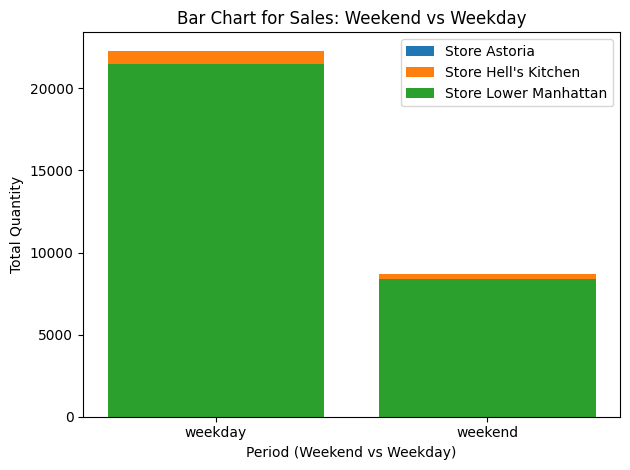

In [135]:
fig, ax = plt.subplots()

# Grouping by "Period" and "Store" to calculate total quantity
grouped = coffee_df.groupby(["day_type", "Store"])["Qty"].sum().reset_index()

# Creating the bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["day_type"], store_data["Qty"], label=f"Store {store}")

# Labelling
ax.set_xlabel("Weekend vs Weekday)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [108]:
#seperating the columns for store
columns = pd.get_dummies(coffee_df['Store'], prefix='')

In [109]:
coffee_df = pd.concat([coffee_df, columns], axis=1)

In [110]:
coffee_df.head(5)

,Date,Time,Qty,Store,Product,period,day_type,_Astoria,_Hell's Kitchen,_Lower Manhattan
0,2023-01-01,07:06:11,2,Lower Manhattan,Coffee,morning,weekend,False,False,True
3,2023-01-01,07:20:24,1,Lower Manhattan,Coffee,morning,weekend,False,False,True
6,2023-01-01,07:25:49,1,Lower Manhattan,Coffee,morning,weekend,False,False,True
7,2023-01-01,07:33:34,2,Lower Manhattan,Coffee,morning,weekend,False,False,True
8,2023-01-01,07:39:13,1,Lower Manhattan,Coffee,morning,weekend,False,False,True


In [127]:
coffee_df["Date"] = pd.to_datetime(coffee_df["Date"])
coffee_df["_Astoria"] = pd.to_numeric(coffee_df["_Astoria"], errors="coerce")
coffee_df["_Astoria"] = pd.to_numeric(coffee_df["_Hell's Kitchen"], errors="coerce")
coffee_df["_Astoria"] = pd.to_numeric(coffee_df["_Lower Manhattan"], errors="coerce")
coffee_df["Qty"] = pd.to_numeric(coffee_df["Qty"], errors="coerce")


#Overview

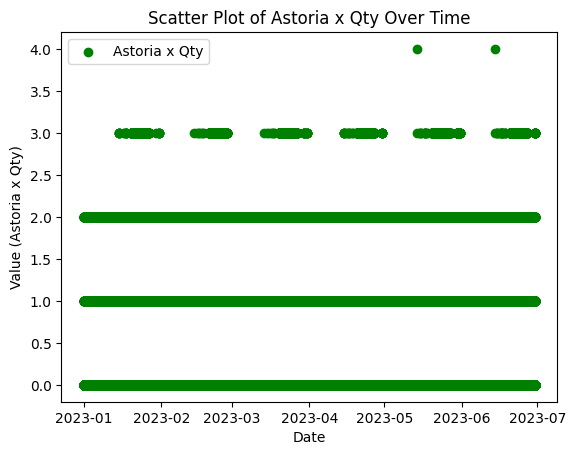

In [130]:
#scatter plot
fig, ax = plt.subplots()
ax.scatter(coffee_df["Date"], coffee_df["_Astoria"] * coffee_df["Qty"], c="green", label="Astoria x Qty")

#labelling
ax.set_xlabel("Date")
ax.set_ylabel("Value (Astoria x Qty)")
ax.set_title("Scatter Plot of Astoria x Qty Over Time")
ax.legend()

#show
plt.show()

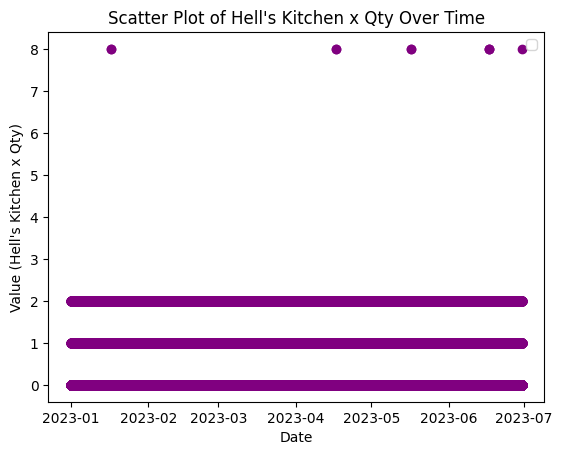

In [129]:
fig, ax = plt.subplots()
ax.scatter(coffee_df["Date"], coffee_df["_Hell's Kitchen"] * coffee_df["Qty"], c="purple", label="_Hell's Kitchen x Qty")

#labelling
ax.set_xlabel("Date")
ax.set_ylabel("Value (Hell's Kitchen x Qty)")
ax.set_title("Scatter Plot of Hell's Kitchen x Qty Over Time")
ax.legend()

#show
plt.show()

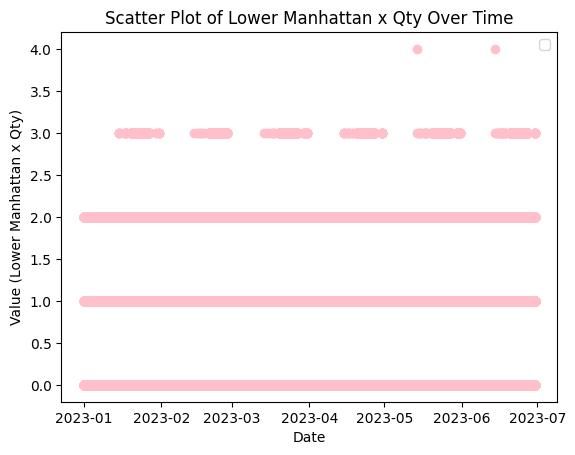

In [131]:
fig, ax = plt.subplots()
ax.scatter(coffee_df["Date"], coffee_df["_Lower Manhattan"] * coffee_df["Qty"], c="pink", label="_Lower Manhattan x Qty")

#labelling
ax.set_xlabel("Date")
ax.set_ylabel("Value (Lower Manhattan x Qty)")
ax.set_title("Scatter Plot of Lower Manhattan x Qty Over Time")
ax.legend()

#show
plt.show()

In [111]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60169 entries, 0 to 149114
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              60169 non-null  datetime64[ns]
 1   Time              60169 non-null  object        
 2   Qty               60169 non-null  int64         
 3   Store             60169 non-null  object        
 4   Product           60169 non-null  object        
 5   period            60169 non-null  category      
 6   day_type          60169 non-null  object        
 7   _Astoria          60169 non-null  bool          
 8   _Hell's Kitchen   60169 non-null  bool          
 9   _Lower Manhattan  60169 non-null  bool          
dtypes: bool(3), category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 3.4+ MB


Now that I've wrangled and shaped the data to my liking, I can begin the EDA process in the next phase of the capstone project. During the EDA process, I will explore the differences in sales based on the time of day and location. Specifically, I will analyze sales trends for different times of the day to identify patterns and variations. Furthermore, I will delve deeper into forecasting future sales and exploring potential improvements through modeling.